# Astronomy 19 Group Project 

By: Dylan, Eric, Ben

## 1. Download the dataset: 

go to the [NASA Exoplanet ArchiveLinks](https://exoplanetarchive.ipac.caltech.edu/) to an external site. and find the 55 Cnc system overview by typing "55 Cnc" into the Explore the Archive searchbar. Scroll down until you see "Ancillary Information" and download the "Radial Velocity Curve" that has 274 points. This will open a new tab with plain text, that you can save in a text file.

<span style="color:lightgreen"> Done!

In [2]:
from astropy.io import ascii
import matplotlib.pyplot as plt
from scipy import optimize
import numpy as np

## 2. In your Jupyter notebook, load the data:
time, radial velocity (RV), and experimental uncertainty on the RV data ; and plot this data. Save this figure as a PDF.

In [3]:
data = ascii.read('Data/UID_0043587_RVC_008.tbl.txt')
data

HJD,Radial_Velocity,Radial_Velocity_Uncertainty
days,m / s,m / s
float64,float64,float64
2449676.0632,131.910003662,4.8400002
2449767.77441,22.6000003815,2.5699999
2449768.83203,-5.48999977112,2.6800001
2449793.79785,107.309997559,1.52
2450056.98828,116.669998169,1.6199999
2450087.88184,77.2600021362,2.1600001
2450088.91894,32.5999984741,1.64
2450089.00586,33.7299995422,1.5599999


In [ ]:
print(data.columns)
print(data.colnames)
print(data.meta)
print(len(data))

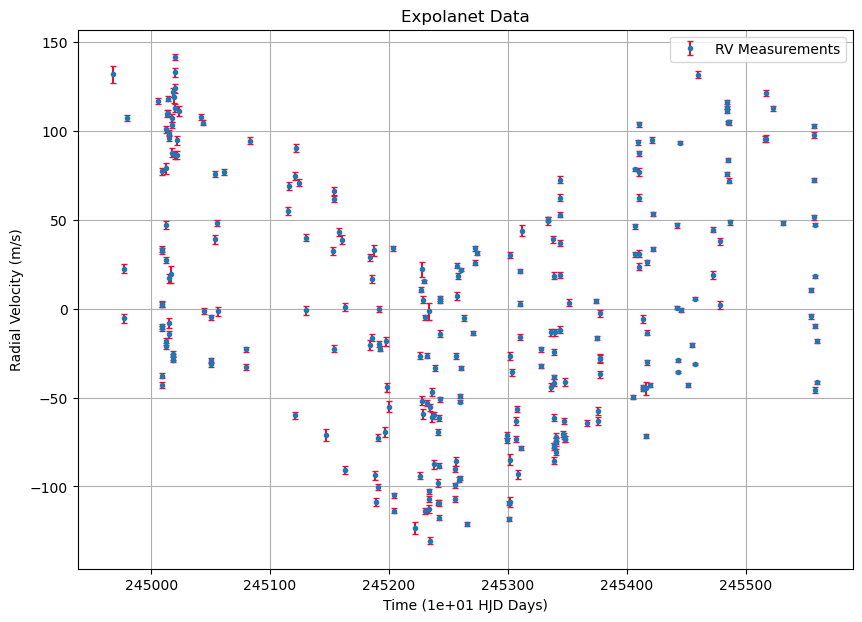

In [7]:
hjd = data.columns["HJD"]
radial_velocity = data.columns["Radial_Velocity"]
uncertainty = data.columns["Radial_Velocity_Uncertainty"]

scalar = 1e1
scaled_hjd = hjd / scalar

plt.figure(figsize=(10, 7))
plt.errorbar(x=scaled_hjd, y=radial_velocity, yerr=uncertainty, fmt="o", ecolor='crimson', capsize=2, markersize=3, label="RV Measurements")

plt.title("Expolanet Data")
plt.xlabel(f"Time ({scalar:.0e} HJD Days)")
plt.ylabel("Radial Velocity (m/s)")

plt.savefig("saved_figures/q2_rv_data_plot.pdf")
plt.legend()
plt.grid()
plt.show()

## 3. Define an oscillatory function in Python to describe the variations of the radial velocity data:

Using the scipy library, fit the oscillatory function to the data, accounting for the uncertainty. Document these steps in the Jupyter notebook, and graph both the model and the data on the same plot. Provide sufficient labeling of data and the axes to provide clarity, and have the notebook save the figure to a PDF.

### 3.1 Define the oscillatory function

In [ ]:
# define the model function we are trying to fit
# a: amplitude
# b: phase shift
# c: wavelength/period
# d: vertical shift
def f_curve(x, a, b, c, d):
    return a * np.sin(2.0*np.pi * (x - b) / c) + d

### 3.2 Fit the function accounting for uncertainty & Graph the model and data 

Fitted params: [ 4.79178271e+01  9.36575654e+03  4.80700695e+02 -1.41826367e+00]


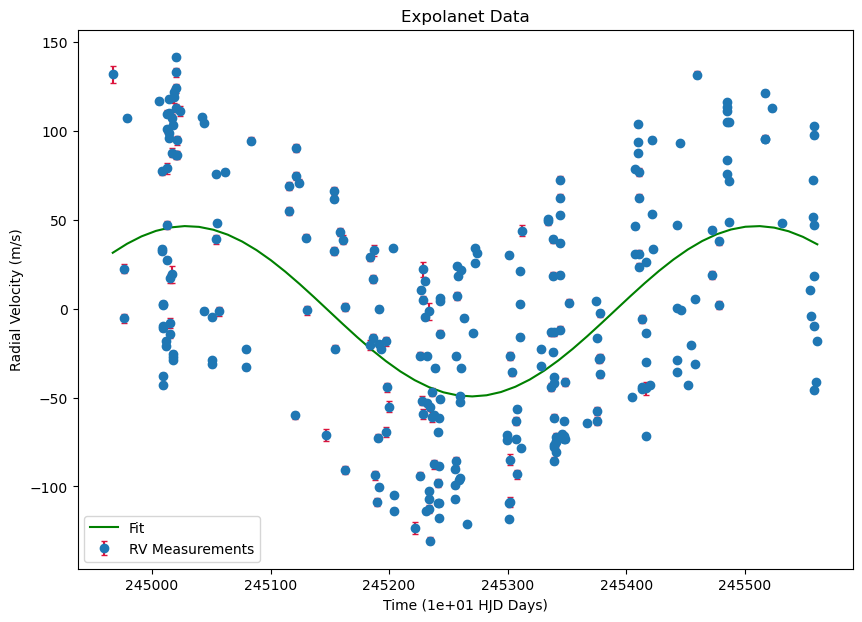

In [25]:
# intial guess
initial_guess = [45, 1, 500, 0]

# we can help scipy find the best fit value by providing the initial guess ourselves
params, params_cov = optimize.curve_fit(f_curve, scaled_hjd, radial_velocity, sigma = uncertainty, absolute_sigma=True,
                                        p0=initial_guess)


params1 = params

# print fitted parameters
print(f"Fitted params: {params}")

x_fit = np.linspace(np.floor(min(scaled_hjd)), np.ceil(max(scaled_hjd)))
y_fit = f_curve(x_fit, *params)     

plt.figure(figsize=(10, 7))
plt.errorbar(x=scaled_hjd, y=radial_velocity, yerr=uncertainty, fmt="o", ecolor='crimson', capsize=2, label="RV Measurements")
plt.plot(x_fit, y_fit, 'g-', label='Fit')
plt.title("Expolanet Data")
plt.xlabel(f"Time ({scalar:.0e} HJD Days)")
plt.ylabel("Radial Velocity (m/s)")

plt.legend()
plt.savefig('saved_figures/q3_planet1_fit.pdf')
plt.show()

## 4. Next, subtract the best fit function from the data to obtain residuals, and plot them:

Assess graphically and mathematically deviations of the measured RV signal from the model. Plot a histogram of the residuals and measure their standard deviation. Is the scatter in the residuals larger than the assumed experimental error? Save the histogram as a PDF using our histogram best practices, including labeling of the data, axis labels, and "reasonable" bin widths as demonstrated in class.

### 4.1 Calculate the residuals

In [11]:
# calculate residuals
y_pred = f_curve(scaled_hjd, *params)
residuals1 = radial_velocity - y_pred

### 4.2 Plot the residuals as a scatter plot

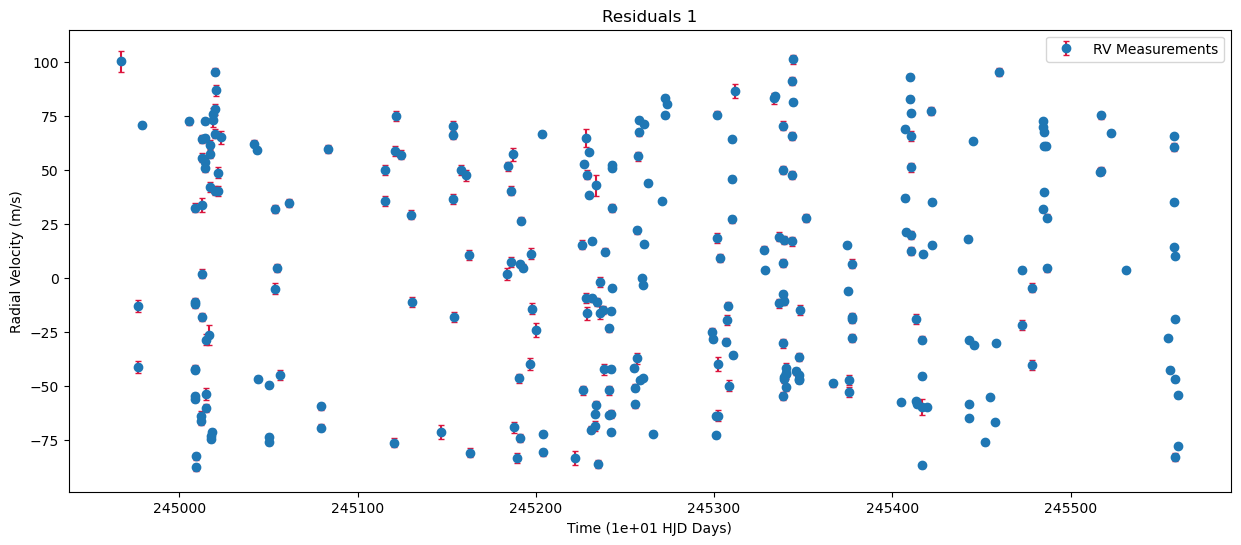

In [ ]:
plt.figure(figsize=(15, 6))

# plot residuals
plt.errorbar(scaled_hjd, residuals1, uncertainty, fmt="o", ecolor='crimson', capsize=2, label="RV Measurements")

plt.xlabel(f"Time ({scalar:.0e} HJD Days)")
plt.ylabel("Radial Velocity (m/s)")
plt.title("Residuals 1")
plt.legend(frameon=True,fontsize=10,handletextpad=1)

plt.show()

### 4.3 Calculate residuals' statistics

In [14]:
residuals_mean = np.mean(residuals1)
residuals_std = np.std(residuals1)
residuals_rms = np.sqrt(np.mean(residuals1**2))

print(f"Residuals mean is  {residuals_mean:.16f}")
print(f"Residuals stdev is {residuals_std:.16f}")
print(f"Residuals RMS is   {residuals_std:.16f}")

Residuals mean is  1.8499898224963913
Residuals stdev is 52.2120813133502395
Residuals RMS is   52.2120813133502395


In [18]:
uncertainty_mean = np.mean(uncertainty)
uncertainty_std = np.std(uncertainty)
uncertainty_rms = np.sqrt(np.mean(uncertainty**2))

print(f"Uncertainty mean is  {uncertainty_mean:.16f}")
print(f"Uncertainty stdev is {uncertainty_std:.16f}")
print(f"Uncertainty RMS is   {uncertainty_std:.16f}")

Uncertainty mean is  1.8060667343065693
Uncertainty stdev is 0.6427887768668138
Uncertainty RMS is   0.6427887768668138


### 4.3 Plot the residuals as a histogram and save

In [19]:
def gaussian(x,mu,s):
    return 1./np.sqrt(2.0*np.pi*s**2) * np.exp(-0.5*((x-mu)/s)**2)

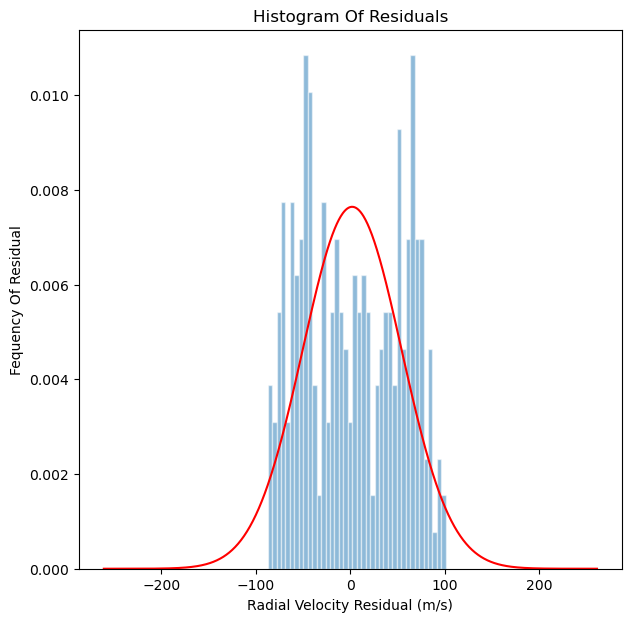

In [24]:
f,ax = plt.subplots(1,1,figsize=(7,7))

counts, bins_custom = np.histogram(residuals1,bins=40)
ax.hist(residuals1,bins=bins_custom,alpha=0.5,edgecolor="white",density=True)

# draw the gaussian function based on mean and stdev of residuals
x_g = np.linspace(-5*residuals_std,5*residuals_std,1000)

ax.plot(x_g,gaussian(x_g,residuals_mean,residuals_std),color="red", label="residual gaussian")
# ax.plot(x_g,gaussian(x_g,uncertainty_mean,uncertainty_std),color="pink", label="uncertainty gaussian")

ax.set_xlabel('Radial Velocity Residual (m/s)')
ax.set_ylabel('Fequency Of Residual')
ax.set_title('Histogram Of Residuals')

plt.savefig('saved_figures/q4_histogram_of_residuals.pdf')
plt.show()

Looking at the spread of the residuals, it appears to be much larger then the assumed experimental error. We can assume this is because the variation in the data isn't solely explained by this one exoplanet and is instead also affected by other exoplanets causing the unexplained variation in the data that this model doesn't explain.

## 5. Can you find more than 2 exoplanets in the RV data?

When multiple planets are orbiting around the star, the "wobbles" from each individual planets are simply summed. Repeat steps 3 and 4 to find a second planet in the RV data.

# Fit the oscillatory function to the data

In [4]:
# Define oscillatory model: amplitude, phase shift, period, vertical offset

def f_curve(x,amplitude,start,period,offset):
    return amplitude * np.sin(2.0 * np.pi * (x-start)/period ) + offset

initial_guess = [60, 1000, 5000, 0]
params, params_cov = optimize.curve_fit(f_curve, scaled_hjd, radial_velocity,
                                        sigma=uncertainty, absolute_sigma=True,
                                        p0=initial_guess)
K1, phi1, P1, offset1 = params

# Ensure positive amplitude
if K1 < 0:
    K1 *= -1
    phi1 += P1 / 2

print(f"Best fit: K1 = {K1:.2f} m/s, P1 = {P1:.2f} d, phi1 = {phi1:.2f} d, offset1 = {offset1:.2f} m/s")

Best fit: K1 = 47.92 m/s, P1 = 4806.92 d, phi1 = 4221.92 d, offset1 = -1.42 m/s


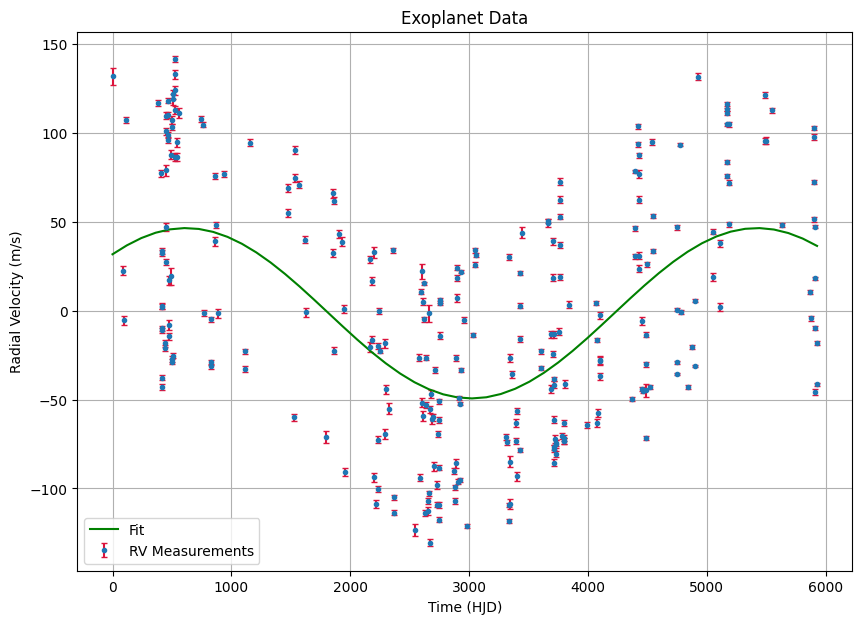

In [5]:
# lets see how the best fit model looks by plotting it along with the data

x_fit = np.linspace(np.floor(min(scaled_hjd)), np.ceil(max(scaled_hjd)))
y_fit = f_curve(x_fit, *params)     # providing '*params' is called unpacking and is identical to write
                                    # 'params[0], params[1], params[2]...'

plt.figure(figsize=(10, 7))
plt.errorbar(x=scaled_hjd, y=radial_velocity, yerr=uncertainty, fmt="o", ecolor='crimson', capsize=2, markersize=3, label="RV Measurements")
plt.plot(x_fit, y_fit, 'g-', label='Fit')
plt.title("Exoplanet Data")
plt.xlabel(f"Time (HJD)")
plt.ylabel("Radial Velocity (m/s)")
plt.legend()
plt.grid()
plt.savefig("planet1_fit.pdf")
plt.show()

# Calculate the residuals

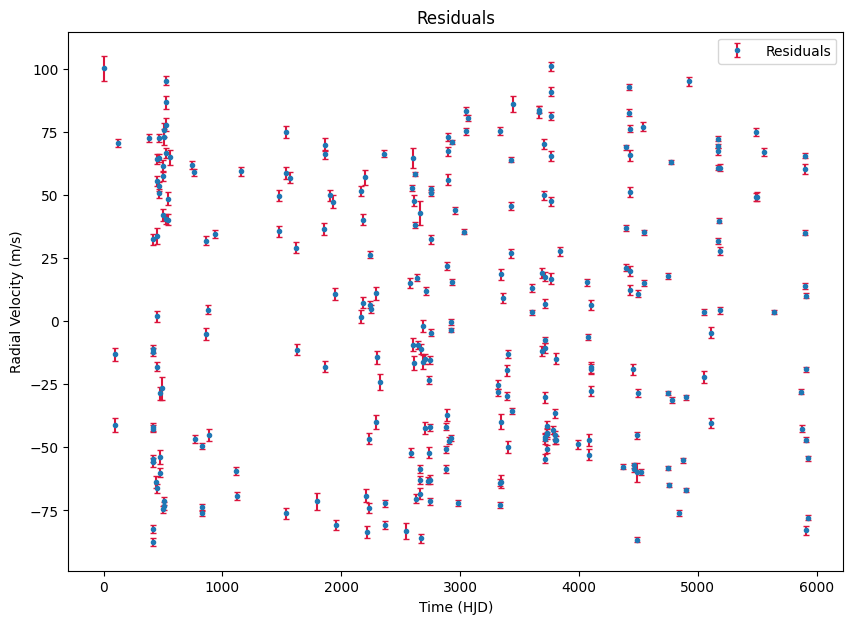

In [6]:
# calculate residuals
y_pred = f_curve(scaled_hjd, *params)
residuals = radial_velocity - y_pred

plt.figure(figsize=(10, 7))

# plot residuals
plt.errorbar(x=scaled_hjd, y=residuals, yerr=uncertainty, fmt="o", ecolor='crimson', capsize=2, markersize=3, label="Residuals")
#plt.errorbar(scaled_hjd, residuals, uncertainty, fmt='o', label='Residuals')

plt.xlabel(f"Time (HJD)")
plt.ylabel("Radial Velocity (m/s)")
plt.title("Residuals")
plt.legend(frameon=True,fontsize=10,handletextpad=1)

plt.show()

# Calculate residual mean, stdev, rms

In [7]:
residuals_mean = np.mean(residuals)
residuals_std = np.std(residuals)
residuals_rms = np.sqrt(np.mean(residuals**2))

print(f"Residuals mean is  {residuals_mean:.16f}")
print(f"Residuals stdev is {residuals_std:.16f}")
print(f"Residuals RMS is   {residuals_std:.16f}")

Residuals mean is  1.8498854684619068
Residuals stdev is 52.2121060812347295
Residuals RMS is   52.2121060812347295


# Second exoplanet

In [8]:
initial_guess2 = [70, 0, 14.65, 0]

params2, _ = optimize.curve_fit(f_curve, scaled_hjd, radial_velocity,
                                sigma=uncertainty, absolute_sigma=True,
                                p0=initial_guess2, maxfev=10000)

K2, phi2, P2, offset2 = params2

print(f"K2 = {K2:.2f} m/s, P2 = {P2:.2f} d, phi2 = {phi2:.2f} d, offset2 = {offset2:.2f} m/s")

K2 = 74.49 m/s, P2 = 14.65 d, phi2 = -4.41 d, offset2 = 4.56 m/s


# Third Exoplanet

In [9]:
initial_guess3 = [6, 0, 0.74, 0]

params3, _ = optimize.curve_fit(f_curve, scaled_hjd, radial_velocity,
                                sigma=uncertainty, absolute_sigma=True,
                                p0=initial_guess3, maxfev=10000)

K3, phi3, P3, offset3 = params3

print(f"K3 = {K3:.2f} m/s, P3 = {P3:.2f} d, phi3 = {phi3:.2f} d, offset3 = {offset3:.2f} m/s")

K3 = 6.44 m/s, P3 = 0.74 d, phi3 = 0.09 d, offset3 = 1.84 m/s


# Calculate the mass of the exoplanets

In [10]:
M_star = 0.95  # Mass of star in solar masses (from NASA Archive)
K_list = [K1, K2, K3]
P_list = [P1, P2, P3]

def estimate_mass(K, P, M_star): # Mass formula provided
    return (K/28.4) * (P/365)**(1/3) * M_star**(2/3)

for i, (K, P) in enumerate(zip(K_list, P_list), 1):
    m_jup = estimate_mass(K, P, M_star)
    print(f"Planet {i}: K = {K:.2f} m/s, P = {P:.2f} d, M ≈ {m_jup:.3f} M_Jup")

Planet 1: K = 47.92 m/s, P = 4806.92 d, M ≈ 3.851 M_Jup
Planet 2: K = 74.49 m/s, P = 14.65 d, M ≈ 0.868 M_Jup
Planet 3: K = 6.44 m/s, P = 0.74 d, M ≈ 0.028 M_Jup
